In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

Max theta: 29.973222706


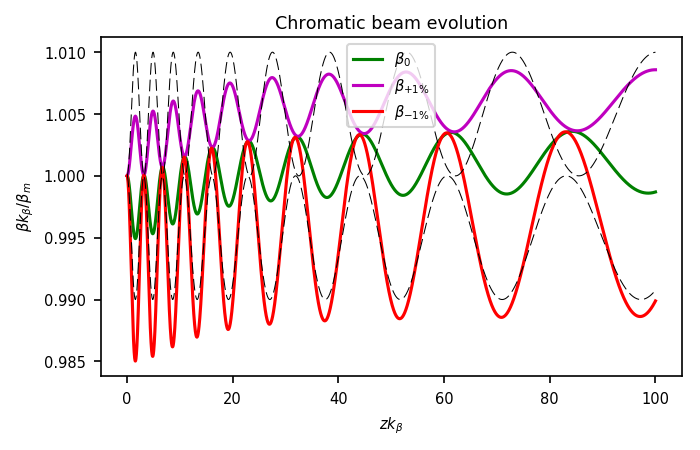

In [2]:
# Look at our realistic ramp
# The matched case in detail
# Check to make sure the matched solution for beta of off energy particles works
N = 5000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.1
delta = 0.01
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*(1+delta), dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*(1-delta), dgdz0, ne0)

betam = 1/np.sqrt(frac)
dz = z[1]-z[0]
theta = (np.cumsum(1/betam)-1/betam[0])*dz
print('Max theta:', theta[-1])
beta1a = 1 + delta/2*(1-np.cos(2*(1-delta/2)*theta))
beta2a = 1 - delta/2*(1-np.cos(2*(1+delta/2)*theta))

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta/betam, 'g')
plt.plot(z, beta1/betam, 'm')
plt.plot(z, betan1/betam, 'r')
plt.plot(z, beta1a, 'k--', linewidth=0.5)
plt.plot(z, beta2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic beam evolution')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta/\beta_m$')
plt.legend([r'$\beta_{0}$', r'$\beta_{+1\%}$', r'$\beta_{-1\%}$'], loc=9)
plt.show()

M = 200
deltaA = np.linspace(-delta, delta, M)
gb0A = gb0*(1+deltaA)
betaDelta = np.zeros((M, N), dtype='double')
alphaDelta = np.zeros((M, N), dtype='double')
gammaDelta = np.zeros((M, N), dtype='double')
for i in range(M):
    betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0, alpha0, gb0A[i],
                                                                                  dgdz0, ne0)
betaP = np.average(betaDelta, axis=0)
alphaP = np.average(alphaDelta, axis=0)
gammaP = np.average(gammaDelta, axis=0)

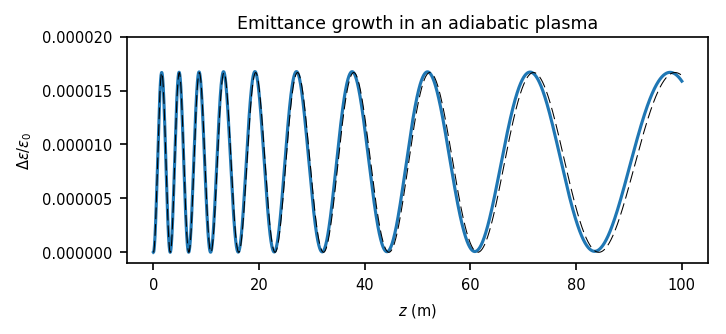

In [3]:
eps = np.sqrt(betaP*gammaP-alphaP**2)
epsa = (1-np.cos(2*theta))*delta**2/12 + 1
# You can kind of capture the beat frequency using something like this
#epsa = (1-(0.6*np.cos(delta*theta)+0.4)*np.cos(2*theta))*delta**2/12 + 1
plt.figure(figsize=(5, 2), dpi=150)
plt.plot(z, eps-1)
plt.plot(z, epsa-1, 'k--', linewidth=0.5)
plt.plot([0.0, 3.5], [1.434, 1.434], 'k--')
plt.title(r'Emittance growth in an adiabatic plasma')
plt.xlabel(r'$z$ (m)')
plt.ylabel(r'$\Delta\epsilon/\epsilon_0$')
#plt.xlim(0, 100)
plt.ylim(-1e-6, 2e-5)
plt.show()

Max theta: 29.973222706


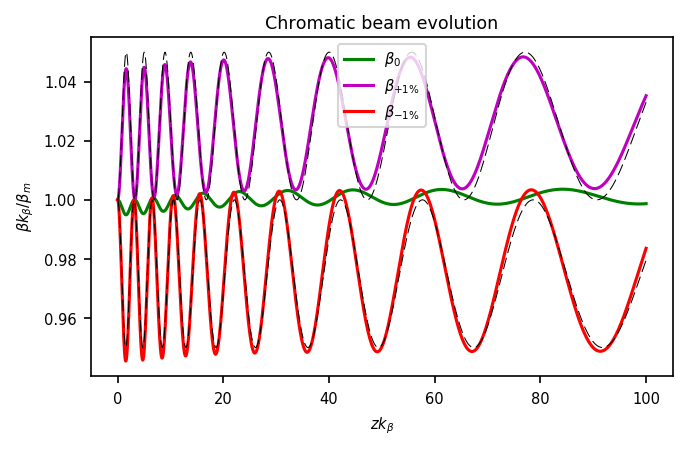

In [4]:
# Let's look at how beta(delta) evolves to see where higher order terms start to matter
# Look at our realistic ramp
# The matched case in detail
# Check to make sure the matched solution for beta of off energy particles works
N = 5000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.1
delta = 0.05
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*(1+delta), dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*(1-delta), dgdz0, ne0)

betam = 1/np.sqrt(frac)
dz = z[1]-z[0]
theta = (np.cumsum(1/betam)-1/betam[0])*dz
print('Max theta:', theta[-1])
beta1a = 1 + delta/2*(1-np.cos(2*(1-delta/2)*theta))
beta2a = 1 - delta/2*(1-np.cos(2*(1+delta/2)*theta))

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta/betam, 'g')
plt.plot(z, beta1/betam, 'm')
plt.plot(z, betan1/betam, 'r')
plt.plot(z, beta1a, 'k--', linewidth=0.5)
plt.plot(z, beta2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic beam evolution')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta/\beta_m$')
plt.legend([r'$\beta_{0}$', r'$\beta_{+1\%}$', r'$\beta_{-1\%}$'], loc=9)
plt.show()

M = 200
deltaA = np.linspace(-delta, delta, M)
gb0A = gb0*(1+deltaA)
betaDelta = np.zeros((M, N), dtype='double')
alphaDelta = np.zeros((M, N), dtype='double')
gammaDelta = np.zeros((M, N), dtype='double')
for i in range(M):
    betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0, alpha0, gb0A[i],
                                                                                  dgdz0, ne0)
betaP = np.average(betaDelta, axis=0)
alphaP = np.average(alphaDelta, axis=0)
gammaP = np.average(gammaDelta, axis=0)

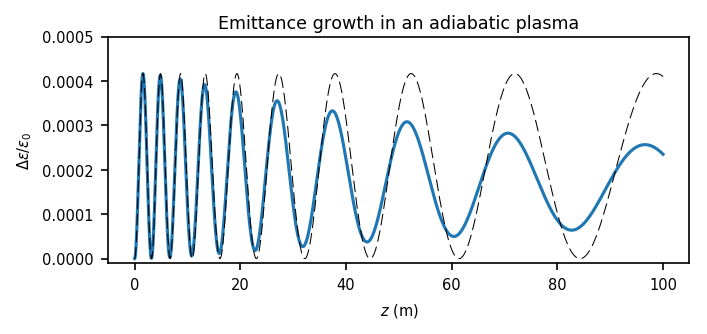

In [5]:
eps = np.sqrt(betaP*gammaP-alphaP**2)
epsa = (1-np.cos(2*theta))*delta**2/12 + 1
# You can kind of capture the beat frequency using something like this
#epsa = (1-(0.6*np.cos(delta*theta)+0.4)*np.cos(2*theta))*delta**2/12 + 1
plt.figure(figsize=(5, 2), dpi=150)
plt.plot(z, eps-1)
plt.plot(z, epsa-1, 'k--', linewidth=0.5)
plt.plot([0.0, 3.5], [1.434, 1.434], 'k--')
plt.title(r'Emittance growth in an adiabatic plasma')
plt.xlabel(r'$z$ (m)')
plt.ylabel(r'$\Delta\epsilon/\epsilon_0$')
#plt.xlim(0, 100)
plt.ylim(-1e-5, 5e-4)
plt.show()

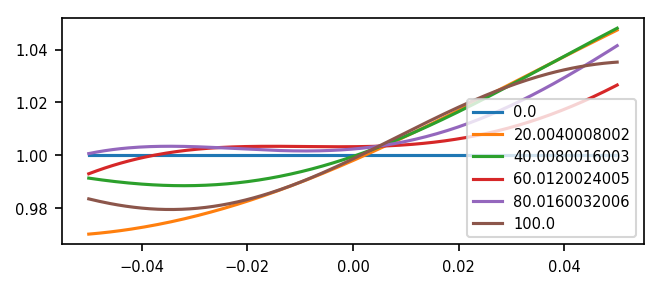

In [8]:
ind = [0, 1000, 2000, 3000, 4000, 4999]
plt.figure(figsize=(5, 2), dpi=150)

for i in range(len(ind)):
    plt.plot(deltaA, betaDelta[:, ind[i]]/betam[ind[i]])

leg = z[ind]
plt.legend(leg)
plt.show()